## Librerías :

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import sys
import cv2 as cv
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tqdm import tqdm
%matplotlib inline

## Data Analysis:


In [2]:
classes={0:'Safe Driving'
         ,1:'texting - right'
         ,2:'talking on the phone - right'
         ,3:'texting - left'
         ,4:'talking on the phone - left'
         ,5:'operating the radio'
         ,6:'drinking'
         ,7:'reaching behind'
         ,8:'hair and makeup'
         ,9:'talking to passenger'}

In [3]:
data1 = pd.read_csv('../files/driver_imgs_list.csv')

for j in np.unique(data1["classname"]):
    print "clase :",j,"Numero de ejemplares:",np.count_nonzero(data1["classname"][data1.classname==j])

clase : c0 Numero de ejemplares: 2489
clase : c1 Numero de ejemplares: 2267
clase : c2 Numero de ejemplares: 2317
clase : c3 Numero de ejemplares: 2346
clase : c4 Numero de ejemplares: 2326
clase : c5 Numero de ejemplares: 2312
clase : c6 Numero de ejemplares: 2325
clase : c7 Numero de ejemplares: 2002
clase : c8 Numero de ejemplares: 1911
clase : c9 Numero de ejemplares: 2129


In [4]:
path_test_images='../../datasets/driver-detections/test/'
path_images='../../datasets/driver-detections/train/'
test_images_names=os.listdir(path_test_images)
print("Numero Ejemplares Test:",len(test_images_names))

('Numero Ejemplares Test:', 79726)


In [5]:
data1.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


### Example  and resize View:

In [9]:
imagen=cv.cvtColor(cv.imread(path_test_images+random.choice(test_images_names)), cv.COLOR_BGR2RGB)
print "Las dimensiones de cada imagen son de:",imagen.shape

Las dimensiones de cada imagen son de: (480, 640, 3)


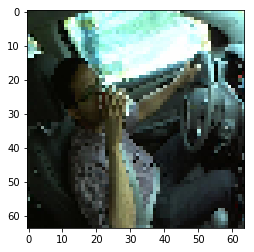

In [10]:
imagen2=cv.resize(imagen,(64,64),interpolation = cv.INTER_CUBIC)
plt.imshow(imagen2)

## Tiny Dataset Creation:

In [6]:
size=300
X_train=[]
y_train=[]
for i in tqdm(np.unique(data1["classname"])):
    for j in np.random.choice(data1["img"][data1.classname==i],size):
    #for j in data1["img"][data1.classname==i]:
        temp_image=cv.cvtColor(cv.imread(path_images+i+"/"+j), cv.COLOR_BGR2RGB)
        X_train.append(cv.resize(temp_image,(64,64),interpolation = cv.INTER_CUBIC))
        y_train.append(int(i[-1]))
        
c = list(zip(X_train, y_train))

random.shuffle(c)

X_train,y_train = zip(*c)   

X_train=np.array(X_train)
y_train=np.array(y_train)

X_train = X_train.astype('float32')
X_train /= 255



100%|██████████| 10/10 [02:04<00:00, 12.48s/it]


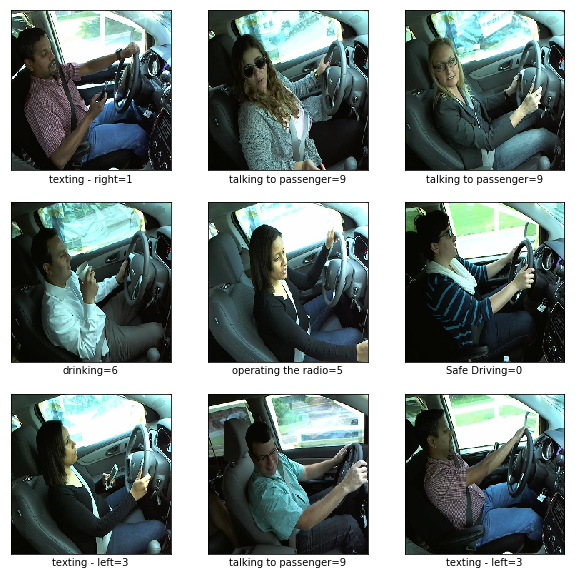

In [172]:

plt.figure(figsize=(10,10))
for i,j in enumerate(np.random.randint(0,500,9)):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[j],cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[j]]+"="+str(y_train[j]))

## Creating Convolutional Neuronal Network

### <span style="color:orange"> Model 1</span>:

In [7]:
model_CNN =  keras.models.Sequential()
model_CNN.add(keras.layers.Conv2D(20, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid', input_shape=(64, 64, 3)))
model_CNN.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(keras.layers.Conv2D(50, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid'))
model_CNN.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(keras.layers.Flatten())
model_CNN.add(keras.layers.Dense(500, activation='relu', kernel_initializer='he_uniform'))
model_CNN.add(keras.layers.Dense(10, activation='softmax'))

model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 20)        1520      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4225500   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total para

In [8]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#loss:categorical_crossentropy if we have y with one hot encoding 


$Fitting:$

In [9]:
history = model_CNN.fit(X_train,y_train, epochs=25, batch_size=60)

Epoch 1/25
3000/3000 [==============================] - 34s - loss: 2.2019 - acc: 0.2050    
Epoch 2/25
3000/3000 [==============================] - 33s - loss: 1.7902 - acc: 0.4093    
Epoch 3/25
3000/3000 [==============================] - 33s - loss: 1.4932 - acc: 0.5383    
Epoch 4/25
3000/3000 [==============================] - 34s - loss: 1.1867 - acc: 0.6387    
Epoch 5/25
3000/3000 [==============================] - 33s - loss: 0.9628 - acc: 0.7223    
Epoch 6/25
3000/3000 [==============================] - 34s - loss: 0.7671 - acc: 0.7827    
Epoch 7/25
3000/3000 [==============================] - 33s - loss: 0.6053 - acc: 0.8390    
Epoch 8/25
3000/3000 [==============================] - 33s - loss: 0.4927 - acc: 0.8810    
Epoch 9/25
3000/3000 [==============================] - 33s - loss: 0.3919 - acc: 0.9123    
Epoch 10/25
3000/3000 [==============================] - 33s - loss: 0.3209 - acc: 0.9347    
Epoch 11/25
3000/3000 [==============================] - 33s - loss: 

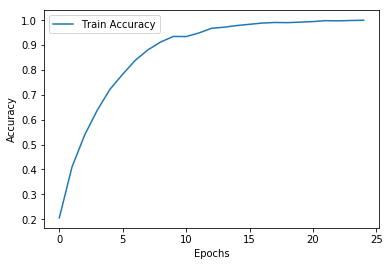

In [52]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

$Testing:$

Foto: img_72847.jpg valor predicho: 6  clase:  drinking
Foto: img_89676.jpg valor predicho: 3  clase:  texting - left
Foto: img_91223.jpg valor predicho: 7  clase:  reaching behind
Foto: img_17900.jpg valor predicho: 1  clase:  texting - right
Foto: img_39893.jpg valor predicho: 9  clase:  talking to passenger
Foto: img_89729.jpg valor predicho: 8  clase:  hair and makeup
Foto: img_13358.jpg valor predicho: 3  clase:  texting - left
Foto: img_58884.jpg valor predicho: 0  clase:  Safe Driving
Foto: img_74443.jpg valor predicho: 3  clase:  texting - left


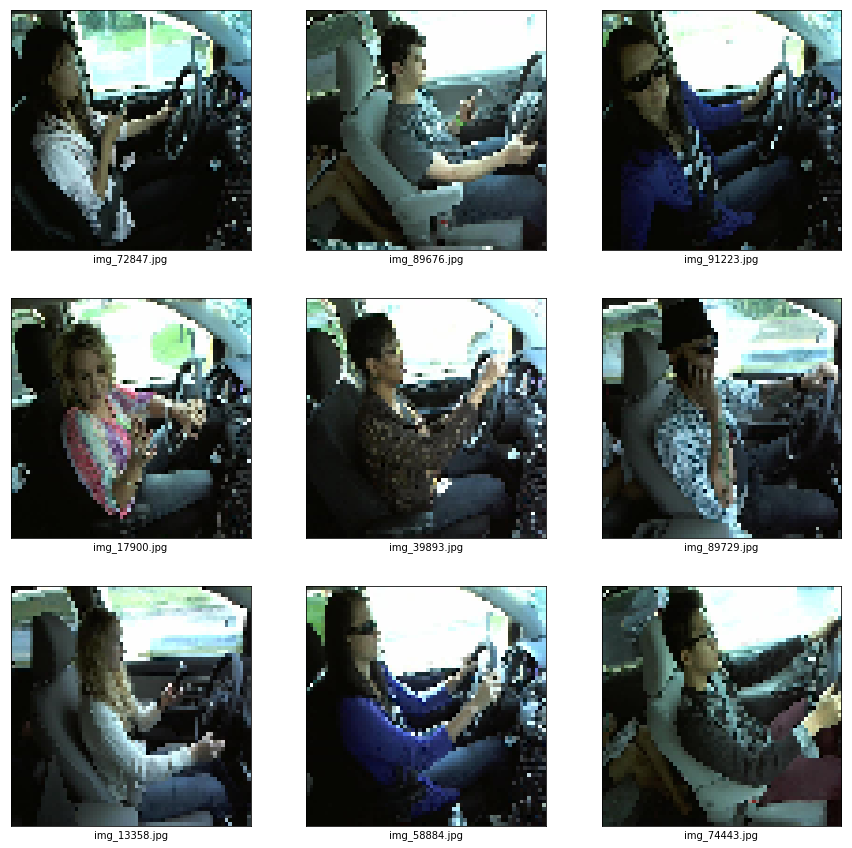

In [14]:
X_test=[]
test_images=np.random.choice(test_images_names,9)
for i in test_images:
    temp_image=cv.cvtColor(cv.imread(path_test_images+i), cv.COLOR_BGR2RGB)
    X_test.append(cv.resize(temp_image,(64,64),interpolation = cv.INTER_CUBIC))
    
X_test=np.array(X_test)
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i],cmap=plt.cm.binary)
    plt.xlabel(test_images[i])

X_test = X_test.astype('float32')
X_test/= 255

prediccion=model_CNN.predict(X_test)
for i in range(len(X_test)):
    print "Foto:",test_images[i],"valor predicho:",  np.argmax(prediccion[i]), " clase: ", classes[np.argmax(prediccion[i])]

## Visualizing filter responses

In [23]:
layer_outputs = [layer.output for layer in model_CNN.layers ]
layer_outputs

[<tf.Tensor 'conv2d/Relu:0' shape=(?, 60, 60, 20) dtype=float32>,
 <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(?, 30, 30, 20) dtype=float32>,
 <tf.Tensor 'conv2d_2/Relu:0' shape=(?, 26, 26, 50) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 13, 13, 50) dtype=float32>,
 <tf.Tensor 'flatten/Reshape:0' shape=(?, 8450) dtype=float32>,
 <tf.Tensor 'dense/Relu:0' shape=(?, 500) dtype=float32>,
 <tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>]

In [49]:
activation_model = keras.models.Model(inputs=model_CNN.input, outputs=layer_outputs)
array = np.expand_dims(X_test[1], axis=0)
activations = activation_model.predict(array)

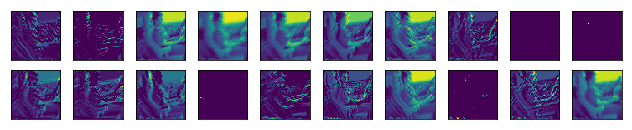

In [50]:
plt.figure(figsize=(11,2))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(activations[0][0,:, :, i], cmap='viridis')
    

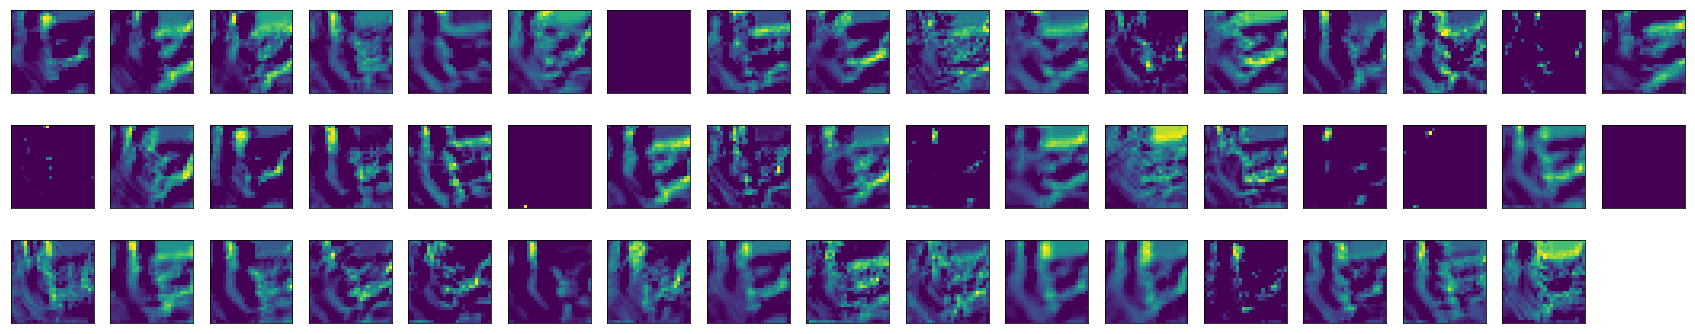

In [51]:
plt.figure(figsize=(30,6))
for i in range(50):
    plt.subplot(3,17,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(activations[2][0,:, :, i], cmap='viridis')

### <span style="color:red"> --------------------------------------------------------------------------------------------------------------------------------------------------- </span>
### <span style="color:orange"> Model 2</span>:

In [63]:
model_CNN2 =  keras.models.Sequential()
model_CNN2.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
model_CNN2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_CNN2.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN2.add(keras.layers.Flatten())
model_CNN2.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'))
model_CNN2.add(keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model_CNN2.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_CNN2.add(keras.layers.Dense(10, activation='softmax'))

model_CNN2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
__________

In [66]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN2.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#loss:categorical_crossentropy if we have y with one hot encoding 


In [ ]:
history2 = model_CNN2.fit(X_train,y_train, epochs=25, batch_size=60)

$Testing:$

Foto: img_20753.jpg valor predicho: 3  clase:  texting - left
Foto: img_84845.jpg valor predicho: 3  clase:  texting - left
Foto: img_3917.jpg valor predicho: 7  clase:  reaching behind
Foto: img_30004.jpg valor predicho: 7  clase:  reaching behind
Foto: img_84391.jpg valor predicho: 0  clase:  Safe Driving
Foto: img_63844.jpg valor predicho: 9  clase:  talking to passenger
Foto: img_69917.jpg valor predicho: 7  clase:  reaching behind
Foto: img_18054.jpg valor predicho: 5  clase:  operating the radio
Foto: img_29668.jpg valor predicho: 1  clase:  texting - right


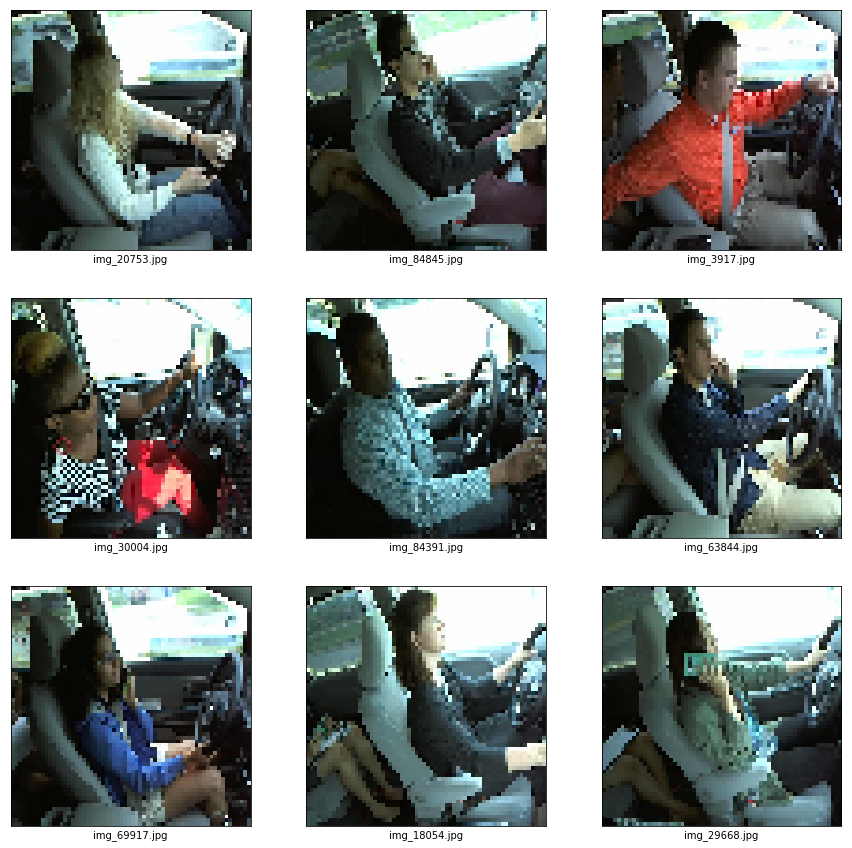

In [70]:
X_test=[]
test_images=np.random.choice(test_images_names,9)
for i in test_images:
    temp_image=cv.cvtColor(cv.imread(path_test_images+i), cv.COLOR_BGR2RGB)
    X_test.append(cv.resize(temp_image,(64,64),interpolation = cv.INTER_CUBIC))
    
X_test=np.array(X_test)
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i],cmap=plt.cm.binary)
    plt.xlabel(test_images[i])

X_test = X_test.astype('float32')
X_test/= 255

prediccion=model_CNN2.predict(X_test)
for i in range(len(X_test)):
    print "Foto:",test_images[i],"valor predicho:",  np.argmax(prediccion[i]), " clase: ", classes[np.argmax(prediccion[i])]

### <span style="color:red"> --------------------------------------------------------------------------------------------------------------------------------------------------- </span>
### <span style="color:orange"> Model 3</span>:

In [ ]:
model_CNN3 =  keras.models.Sequential()
model_CNN3.add(keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', input_shape=(64, 64, 3)))
model_CNN3.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN3.add(keras.layers.Dropout(0.5))
model_CNN3.add(keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal')
model_CNN3.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN3.add(keras.layers.Dropout(0.5))
model_CNN3.add(keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal')
model_CNN3.add(keras.layers.MaxPooling2D((8, 8)))
model_CNN3.add(keras.layers.Dropout(0.5))
model_CNN3.add(keras.layers.Flatten())
model_CNN3.add(keras.layers.Dense(10, activation='softmax'))


model_CNN3.summary()

opt = keras.optimizers.SGD(lr=1e-3, momentum=0.9)
model_CNN3.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history3 = model_CNN3.fit(X_train,y_train, epochs=25, batch_size=60)

In [ ]:
plt.plot(history3.history['acc'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()